# Netflix Data Analysis

## Description
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## Questions
1. Best rated Director
2. Best rated casting member
3. Closeness based on description
4. Recommended system based on all variables

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('netflix_titles.csv', header=0)

In [3]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
df.shape

(6234, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df['director'].value_counts(ascending=False).iloc[:10]

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Martin Scorsese            9
Steven Spielberg           9
David Dhawan               8
Johnnie To                 8
Lance Bangs                8
Cathy Garcia-Molina        7
Name: director, dtype: int64

In [9]:
df['type'].value_counts(ascending=False)

Movie      4265
TV Show    1969
Name: type, dtype: int64

### Changing String into List Columns

In [10]:
# Function to convert list in a column to 1d list
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [11]:
df['country'].fillna('Worldwide', inplace=True)
df['cast'] = df['cast'].str.split(', ')
df['director'] = df['director'].str.split(', ')
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')
df['cast'].dropna(inplace=True)
df['director'].dropna(inplace=True)

In [12]:
df.shape

(6234, 12)

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country            0
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

## Univariate Analysis

### 1) Type

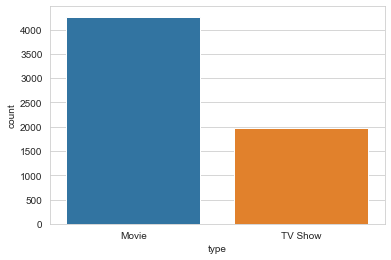

In [14]:
sns.countplot(df['type'])

As you can see from the graph above, there are more movies than a Tv show.

### 2) Director

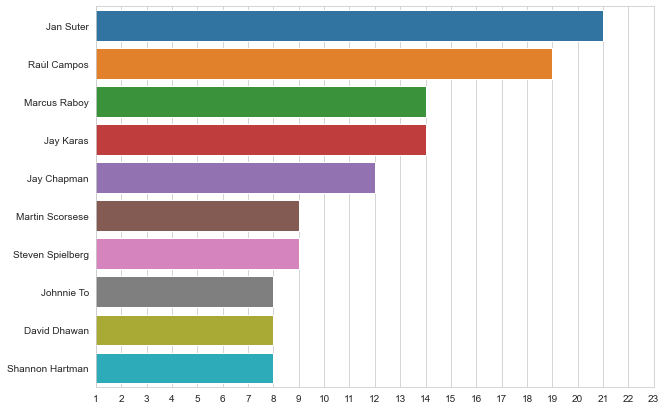

In [15]:
plt.figure(figsize=[10,7])
plt.xlim(1,23)
plt.xticks(range(1,24))
sns.barplot(y = to_1D(df['director']).value_counts(sort=True).iloc[:10].index, x = to_1D(df['director']).value_counts(sort=True).iloc[:10])

As you can see from the graph above, Jan Suter is the most director to produce movie/show in this dataset.

### 3) Casting Member

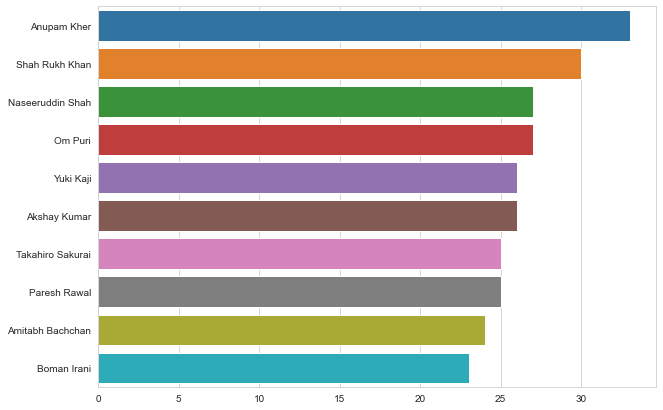

In [16]:
plt.figure(figsize=[10,7])
sns.barplot(y = to_1D(df['cast']).value_counts(sort=True).iloc[:10].index, x = to_1D(df['cast']).value_counts(sort=True).iloc[:10])

As you can see from the graph above, Anupam Kher is the most casting member to appear in this dataset.

### 4) Release Year

Text(0, 0.5, 'Movie Counts')

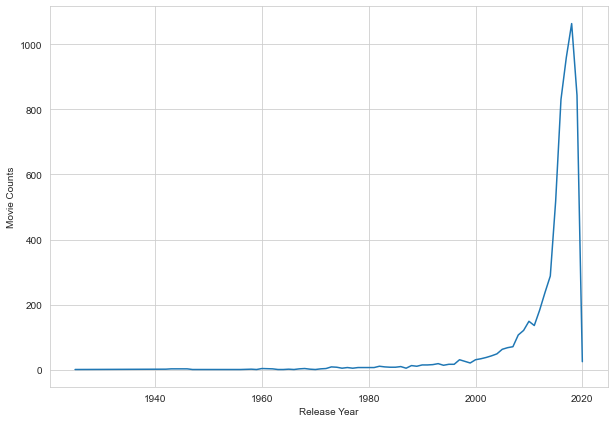

In [17]:
plt.figure(figsize=[10,7])
sns.lineplot(x=df['release_year'].value_counts().index, y=df['release_year'].value_counts())
plt.xlabel('Release Year')
plt.ylabel('Movie Counts')

As you can see from the graph above, there are significance movie released between 2010 - 2020.

### 5) Ratings

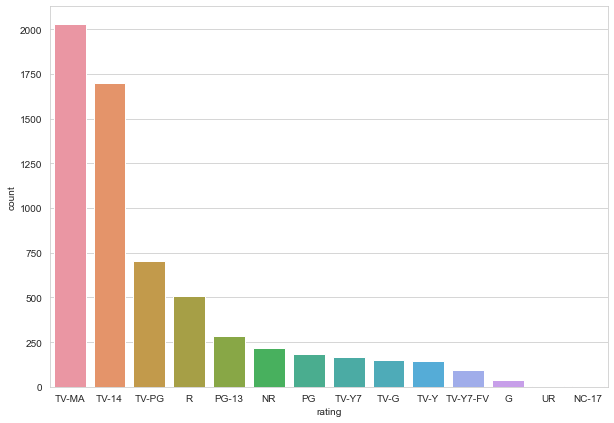

In [18]:
plt.figure(figsize=[10,7])
sns.countplot(df['rating'], order = df['rating'].value_counts(sort=True).index)

As you can see from the graph above, TV-MA dominated the rating besides TV-14.

### 6) Genres 

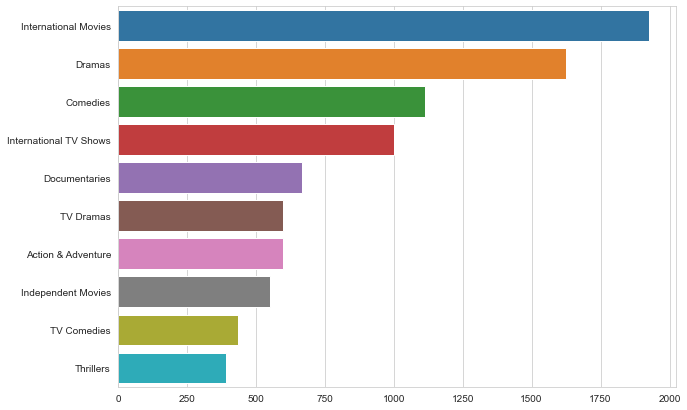

In [19]:
plt.figure(figsize=[10,7])
sns.barplot(y = to_1D(df['listed_in']).value_counts(sort=True).iloc[:10].index, x = to_1D(df['listed_in']).value_counts(sort=True).iloc[:10])

As you can see from the graph above, International Movies is the most popular genres, followed by Dramas and Comedies.

## Bivariate Analysis

In [20]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
df['release_year'] = df['release_year'].astype('str')

### Trend of Types

Text(0, 0.5, 'Title Count')

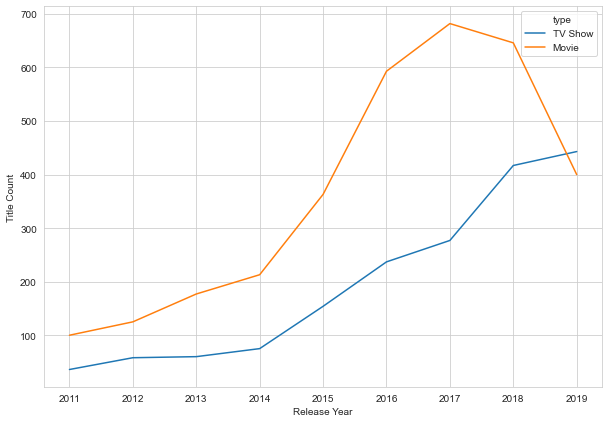

In [22]:
type_year=df.groupby(['release_year','type'],as_index=False)['title'].count()
plt.figure(figsize=[10,7])
sns.lineplot(x=type_year['release_year'].iloc[-20:-2], y=type_year['title'].iloc[-20:-2], hue=type_year['type'])
plt.xlabel('Release Year')
plt.ylabel('Title Count')

As you can see from the graph above, there is a trend that tv show overtake movie in count as the year progress.

# Movie Simmilarity

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib
movie = pd.read_csv('netflix_titles.csv', header=0)
movie['index']=movie.index
features = ['type','director','cast','rating','listed_in','description']

In [24]:
movie.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'index'],
      dtype='object')

In [25]:
movie['country'].fillna('Worldwide', inplace=True)
movie['cast'] = movie['cast'].str.split(', ')
movie['director'] = movie['director'].str.split(', ')
movie['country'] = movie['country'].str.split(', ')
movie['listed_in'] = movie['listed_in'].str.split(', ')
movie['cast'].dropna(inplace=True)
movie['director'].dropna(inplace=True)
for feature in features:
    movie[feature] = movie[feature].fillna('')

In [26]:
def list_to_string(list):
    return ','.join(map(str, list)) 

def title_from_index(index):
    return movie[movie['index'] == index]["title"].values[0]

def index_from_title(title):
    title_list = movie['title'].tolist()
    common = difflib.get_close_matches(title, title_list, 1)
    titlesim = common[0]
    return movie[movie['title'] == titlesim]["index"].values[0]

In [27]:
for count, row in enumerate(movie['cast']):
    changed = list_to_string(row)
    movie['cast'].iloc[count]=changed

for count, row in enumerate(movie['director']):
    changed = list_to_string(row)
    movie['director'].iloc[count]=changed
    
for count, row in enumerate(movie['listed_in']):
    changed = list_to_string(row)
    movie['listed_in'].iloc[count]=changed

C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
def combine_features(row):
    try:
        return row['type'] +" "+row['director']+" "+row['cast']+" "+row['rating']+" "+row['listed_in']+" "+row['description']
    except:
        print ("Error:", row)

movie["combined_features"] = movie.apply(combine_features,axis=1)

In [29]:
movie.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                  director                                               cast  \
0  Richard Finn,Tim Maltby  Alan Marriott,Andrew Toth,Brian Dobson,Cole Ho...   
1                                                            Jandino Asporaat   
2                           Peter Cullen,Sumalee Montano,Frank Welker,Jeff...   
3                           Will Friedle,Darren Criss,Constance Zimmer,Kha...   
4         Fernando Lebrija  Nesta Cooper,Kate Walsh,John Michael Higgins,K...   

                                      country         date_added  \
0  [United States, India, South Korea, China]  September 9, 2019   
1                            [United Kingdom]  September 9, 2016   
2                             [United States]  September 8, 2018   
3                             [United States]  September 8, 2018   
4                             [United States]  September 8, 2017   

   release_year    rating  duration                          listed_in  \
0          2019     TV-PG    90 min  Children & Family Movies,Comedies   
1          2016     TV-MA    94 min                    Stand-Up Comedy   
2          2013  TV-Y7-FV  1 Season                           Kids' TV   
3          2016     TV-Y7  1 Season                           Kids' TV   
4          2017     TV-14    99 min                           Comedies   

                                         description  index  \
0  Before planning an awesome wedding for his gra...      0   
1  Jandino Asporaat riffs on the challenges of ra...      1   
2  With the help of three human allies, the Autob...      2   
3  When a prison ship crash unleashes hundreds of...      3   
4  When nerdy high schooler Dani finally attracts...      4   

                                   combined_features  
0  Movie Richard Finn,Tim Maltby Alan Marriott,An...  
1  Movie  Jandino Asporaat TV-MA Stand-Up Comedy ...  
2  TV Show  Peter Cullen,Sumalee Montano,Frank We...  
3  TV Show  Will Friedle,Darren Criss,Constance Z...  
4  Movie Fernando Lebrija Nesta Cooper,Kate Walsh...

In [30]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(movie["combined_features"])
cosine_sim = cosine_similarity(count_matrix) 

In [31]:
user_movie = input("Enter movie of your choice:\t")
movie_index = index_from_title(user_movie)

Enter movie of your choice:	Transformers Prime


In [32]:
similar_movies =  list(enumerate(cosine_sim[movie_index]))
similar_movies_sorted = sorted(similar_movies,key=lambda x:x[1],reverse=True)
i=0
print("\nOther movies you might be interested in:-\n")
for rec_movie in similar_movies_sorted:
        if(i!=0):
            print (i,") ",title_from_index(rec_movie[0]),sep="")
        i=i+1
        if i>50:
            break


Other movies you might be interested in:-

1) Danger Mouse
2) Prohibition: A Film by Ken Burns and Lynn Novick
3) Bobby Kennedy for President
4) Pororo - The Little Penguin
5) What's New Scooby-Doo?
6) Anjaan: Special Crimes Unit
7) YOM
8) DreamWorks Spooky Stories: Volume 2
9) Kulipari: Dream Walker
10) Narcos: Mexico
11) Sex, Explained
12) Earth's Natural Wonders: Life at the Extremes
13) Intelligence
14) The Deep
15) Jailbirds
16) Kingdoms of the Sky
17) The Blue Planet: A Natural History of the Oceans
18) Dope
19) Operation Gold Rush
20) Kabaneri of the Iron Fortress: The Battle of Unato
21) Classic Legends
22) Little Baby Bum: Nursery Rhyme Friends
23) Battlefish
24) Dead Set
25) Forces of Nature
26) Raja Rasoi Aur Anya Kahaniyan
27) The Last of the Schmucks
28) The Making of Frozen Planet
29) Power Rangers Dino Charge
30) Flavorful Origins
31) Nisman: The Prosecutor, the President, and the Spy
32) The Boss Baby: Back in Business
33) Planet Earth: The Complete Collection
34) Dark